In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



c:\Users\ma3\anaconda3\envs\python_learn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ma3\anaconda3\envs\python_learn\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ma3\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to ac

In [2]:
import seaborn as sns

In [ ]:
df_DA_us = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

df_DA_us = df_DA_us.dropna(subset="salary_year_avg")

In [7]:
df_DA_explode = df_DA_us.explode("job_skills").copy()

In [18]:
skill_stats1 = df_DA_explode.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"),
    salary_avg = ("salary_year_avg", "median")
)
skill_stats1 = skill_stats1.sort_values(by="salary_avg",ascending=False).head(10)
skill_stats1

,skill_count,salary_avg
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [13]:
skill_stats = df_DA_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    salary_avg=('salary_year_avg', 'mean')
).sort_values('skill_count', ascending=False).head(10).sort_values(by="salary_avg",ascending=False)

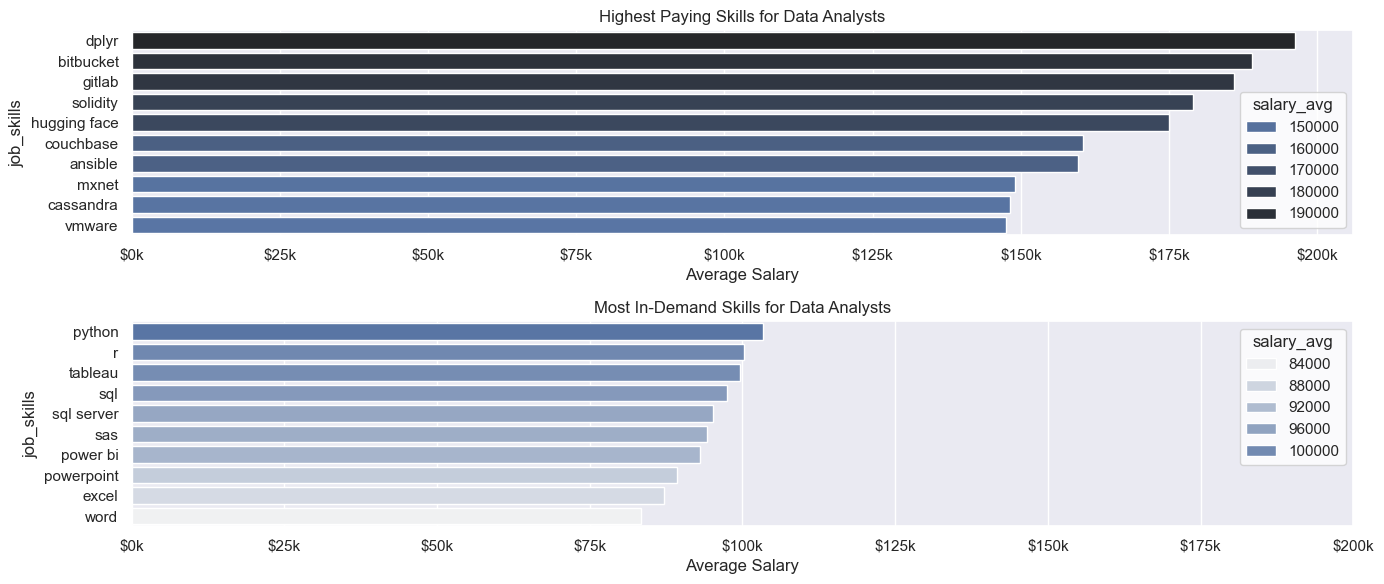

In [27]:

# Assuming:
# skill_stats1: DataFrame for top 10 highest paying skills
# skill_stats2: DataFrame for most in-demand skills (with skill_count and salary_avg)

fig, ax = plt.subplots(2, 1, figsize=(14, 6))

# First plot: Highest paying skills
# skill_stats1.plot(kind="barh", y="salary_avg",color="skyblue", ax=ax[0], legend=False)
sns.set_theme(style="ticks")

sns.barplot(data=skill_stats1, x="salary_avg", y=skill_stats1.index, ax=ax[0], hue="salary_avg", palette="dark:b_r")

ax[0].set_title("Highest Paying Skills for Data Analysts")
ax[0].set_xlabel("Average Salary")
# ax[0].invert_yaxis()  # highest on top
ax[0].set_xlim(ax[0].get_xlim())
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f"${int(x/1000)}k"))

# Second plot: Most in-demand skills
# skill_stats.plot(kind="barh", y="salary_avg",color="lightgreen", ax=ax[1], legend=False)

sns.barplot(data=skill_stats, x="salary_avg", y=skill_stats.index, ax=ax[1], hue="salary_avg", palette="light:b")


ax[1].set_title("Most In-Demand Skills for Data Analysts")
ax[1].set_xlabel("Average Salary")
# ax[1].invert_yaxis()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f"${int(x/1000)}k"))
ax[1].set_xlim(0, 200000)


plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of Jobs')

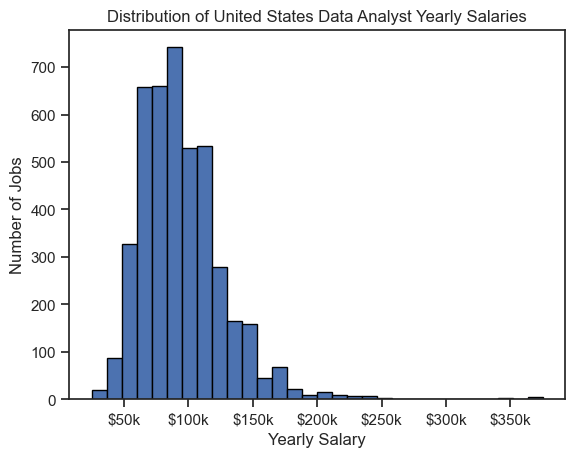

In [31]:
df_DA_us["salary_year_avg"].plot(kind="hist", bins=30, edgecolor="black")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")

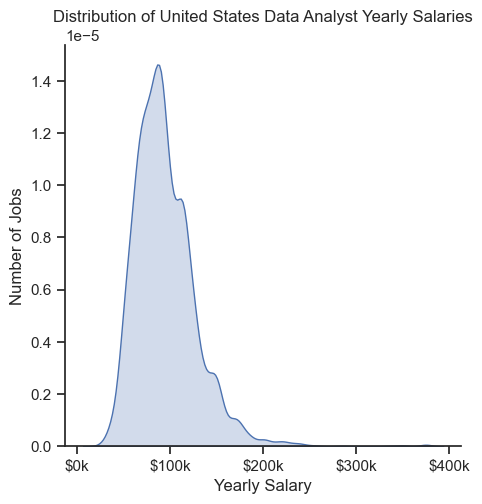

In [36]:
sns.displot(df_DA_us["salary_year_avg"], kind="kde", fill=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.show()